### Importing the libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import save_model
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation,Dense
from keras.utils import plot_model

### Creating feature matrix and target vector

In [2]:
X=np.array(([1,1,1,0],[0,1,0,1],[1,1,0,0],[1,0,0,1]), dtype=float)
y=np.array(([0],[1],[0],[1]), dtype=float)

### Building the model

In [3]:
model= tf.keras.Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Compiling the model

In [4]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training the model

In [5]:
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
1/1 [==============================] - 8s 8s/step - loss: 0.7780 - accuracy: 0.2500
Epoch 2/150
1/1 [==============================] - 0s 68ms/step - loss: 0.7737 - accuracy: 0.2500
Epoch 3/150
1/1 [==============================] - 0s 27ms/step - loss: 0.7697 - accuracy: 0.2500
Epoch 4/150
1/1 [==============================] - 0s 17ms/step - loss: 0.7658 - accuracy: 0.2500
Epoch 5/150
1/1 [==============================] - 0s 16ms/step - loss: 0.7631 - accuracy: 0.2500
Epoch 6/150
1/1 [==============================] - 0s 17ms/step - loss: 0.7605 - accuracy: 0.2500
Epoch 7/150
1/1 [==============================] - 0s 12ms/step - loss: 0.7579 - accuracy: 0.2500
Epoch 8/150
1/1 [==============================] - 0s 13ms/step - loss: 0.7551 - accuracy: 0.2500
Epoch 9/150
1/1 [==============================] - 0s 12ms/step - loss: 0.7522 - accuracy: 0.2500
Epoch 10/150
1/1 [==============================] - 0s 12ms/step - loss: 0.7494 - accuracy: 0.2500
Epoch 11/150
1/1 [===

Epoch 84/150
1/1 [==============================] - 0s 10ms/step - loss: 0.5954 - accuracy: 1.0000
Epoch 85/150
1/1 [==============================] - 0s 15ms/step - loss: 0.5929 - accuracy: 1.0000
Epoch 86/150
1/1 [==============================] - 0s 15ms/step - loss: 0.5906 - accuracy: 1.0000
Epoch 87/150
1/1 [==============================] - 0s 15ms/step - loss: 0.5881 - accuracy: 1.0000
Epoch 88/150
1/1 [==============================] - 0s 32ms/step - loss: 0.5856 - accuracy: 1.0000
Epoch 89/150
1/1 [==============================] - 0s 18ms/step - loss: 0.5830 - accuracy: 1.0000
Epoch 90/150
1/1 [==============================] - 0s 20ms/step - loss: 0.5812 - accuracy: 1.0000
Epoch 91/150
1/1 [==============================] - 0s 16ms/step - loss: 0.5789 - accuracy: 1.0000
Epoch 92/150
1/1 [==============================] - 0s 17ms/step - loss: 0.5763 - accuracy: 1.0000
Epoch 93/150
1/1 [==============================] - 0s 11ms/step - loss: 0.5739 - accuracy: 1.0000
Epoch 94/1

### Evaluating the model

In [6]:
accuracy= model.evaluate(X, y, verbose=0)
print('%s: %.2f%%' %(model.metrics_names[1], accuracy[1]*100))

accuracy: 100.00%


### Summarizing the model

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 297
Trainable params: 297
Non-trainable params: 0
_________________________________________________________________


### Making predictions with the model

In [8]:
predictions=(model.predict(X) > 0.5).astype(int)
predictions

1/1 [==============================] - 0s 256ms/step


array([[0],
       [1],
       [0],
       [1]])

### looping through the model to compare actual and expected

In [9]:
for i in range(4):
    print('%s => %d (expected %d)' % (X[i]. tolist(), predictions[i], y[i]))

[1.0, 1.0, 1.0, 0.0] => 0 (expected 0)
[0.0, 1.0, 0.0, 1.0] => 1 (expected 1)
[1.0, 1.0, 0.0, 0.0] => 0 (expected 0)
[1.0, 0.0, 0.0, 1.0] => 1 (expected 1)


### Saving the model

In [10]:
save_model(model, 'model.h5')

### Ploting the graph of the model

Plotting the model


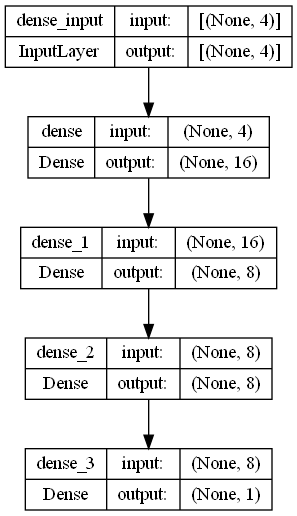

In [11]:
print("Plotting the model")
plot_model(model, to_file="model_plot.png", show_shapes=True, show_layer_names=True)
